<h1>R Programming Assessment</h1>

**Data Import** 

##
x = c("ggplot2", "corrgram", "ggcorrplot", "DMwR", "caret", "randomForest", "unbalanced", "C50", "dummies", "e1071", "Information",
      "MASS", "rpart", "gbm", "ROSE", "sampling", "DataCombine", "inTrees", "ranger", "rpart.plot")
install.packages(x)
##

In [1]:
bike_df<-read.csv("day.csv")
head(bike_df,5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Remove the casual and registered variable due to total_count is combined of both.

In [2]:
bike_df<-subset(bike_df,select=-c(casual,registered))
head(bike_df,5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
dim(bike_df)

[1] 731  14

In [4]:
summary(bike_df)

    instant         dteday              season            yr        
 Min.   :  1.0   Length:731         Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   Mode  :character   Median :3.000   Median :1.0000  
 Mean   :366.0                      Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0                      Max.   :4.000   Max.   :1.0000  
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.000  
   weathersit         temp             atemp    

In [5]:
str(bike_df)

'data.frame':	731 obs. of  14 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "01-01-2011" "02-01-2011" "03-01-2011" "04-01-2011" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


***Rename the columns for better understanding of variables***

In [6]:
names(bike_df)<-c('rec_id','datetime','season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','total_count')
head(bike_df,5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


**TypeCasting**

In [7]:
bike_df$datetime<- as.Date(bike_df$datetime)
bike_df$year<-as.factor(bike_df$year)
bike_df$month<-as.factor(bike_df$month)
bike_df$season <- as.factor(bike_df$season)
bike_df$holiday<- as.factor(bike_df$holiday)
bike_df$weekday<- as.factor(bike_df$weekday)
bike_df$workingday<- as.factor(bike_df$workingday)
bike_df$weather_condition<- as.factor(bike_df$weather_condition)

**Finding Missing Value**

In [8]:
missing_val<-data.frame(apply(bike_df,2,function(x){sum(is.na(x))}))
names(missing_val)[1]='missing_val'
missing_val

,missing_val
,<int>
rec_id,0
datetime,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather_condition,0


**Distribution Plots**

***Seasonal monthly distribution*** 

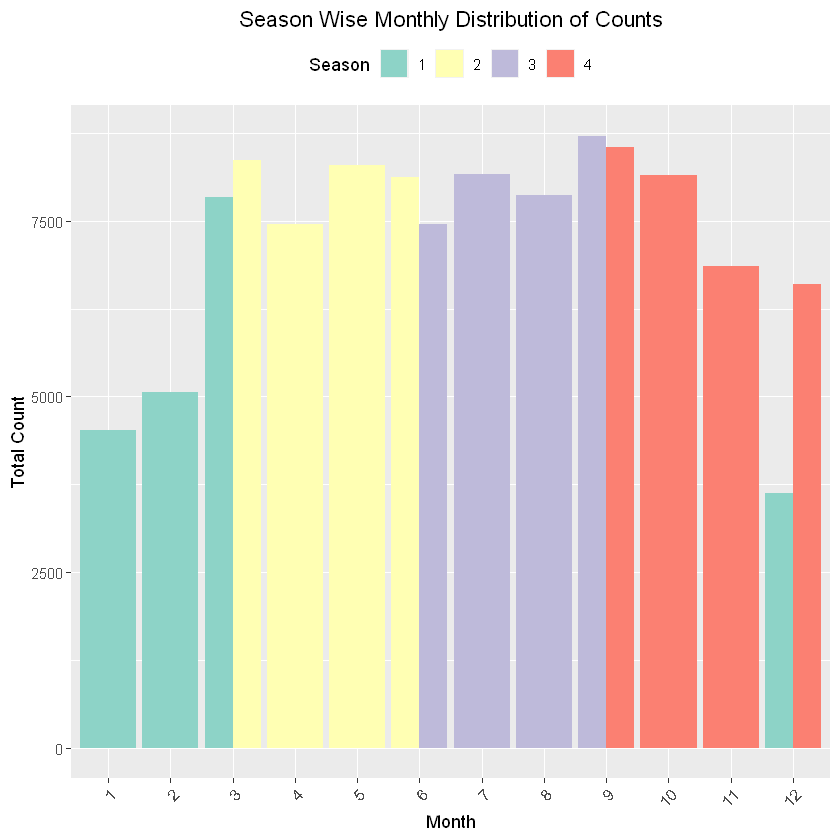

In [9]:
#install.packages("ggplot2")
library("ggplot2")
ggplot(bike_df, aes(x = factor(month), y = total_count, fill = season)) +
  geom_bar(stat = "identity", position = "dodge") + 
  scale_fill_brewer(palette = "Set3") + 
  theme_gray() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        plot.title = element_text(hjust = 0.5), 
        legend.position = "top") +
  labs(x = 'Month',
       y = 'Total Count',
       fill = 'Season',
       title = 'Season Wise Monthly Distribution of Counts')

***Weekday monthly distribution***

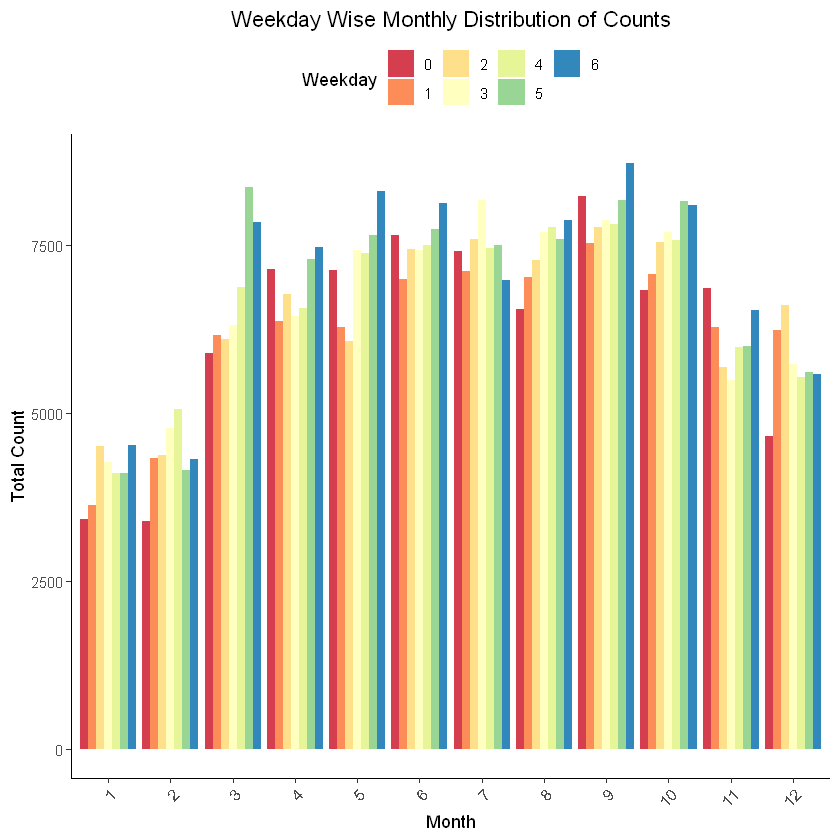

In [10]:
ggplot(bike_df, aes(x = factor(month), y = total_count, fill = weekday)) +
  geom_bar(stat = "identity", position = "dodge") + 
  scale_fill_brewer(palette = "Spectral") + 
  theme_classic() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        plot.title = element_text(hjust = 0.5), 
        legend.position = "top") + 
  labs(x = 'Month',
       y = 'Total Count',
       fill = 'Weekday',
       title = 'Weekday Wise Monthly Distribution of Counts')

From the above plots, we can observed that increasing the bike rental count in spring and summer season and then decreasing the bike rental count in fall and winter season.
Here, season 1 -> spring, season 2 -> summer, season 3 -> fall, season 4 -> winter


**Yearly distribution**

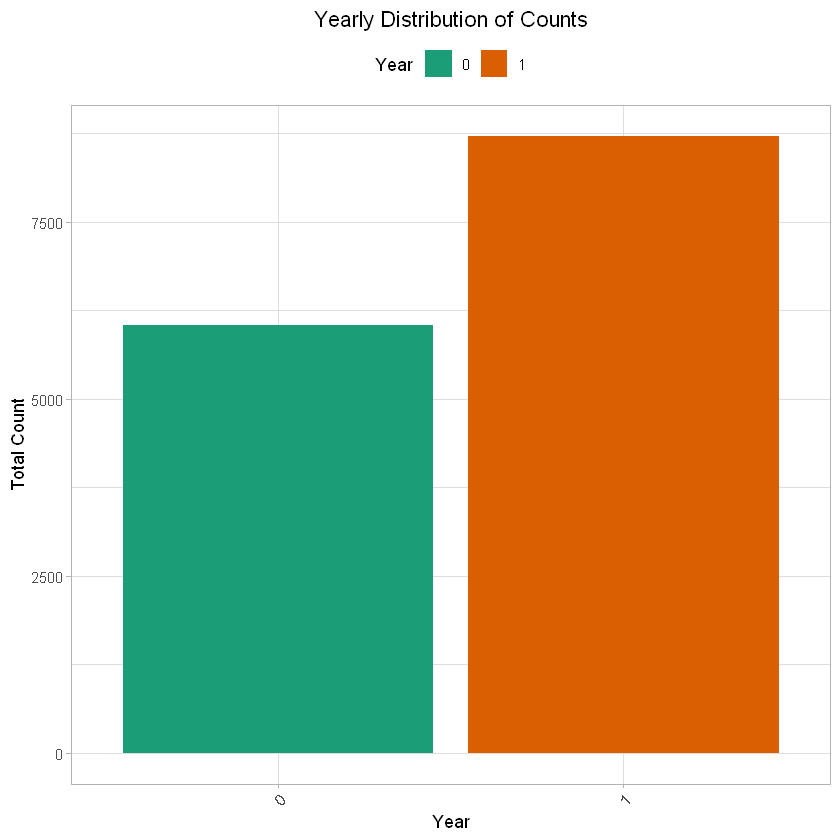

In [11]:
ggplot(bike_df, aes(x = factor(year), y = total_count, fill = factor(year))) +
  geom_bar(stat = "identity", position = "dodge") + 
  scale_fill_brewer(palette = "Dark2") + 
  theme_light() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        plot.title = element_text(hjust = 0.5), 
        legend.position = "top") + 
  labs(x = 'Year',
       y = 'Total Count',
       fill = 'Year',
       title = 'Yearly Distribution of Counts')

From above bar plot, we can observed that the bike rental count distribution is highest in year 2012 then the in year 2011.
Here, year 0-> 2011, year 1-> 2012

**Holiday distribution**

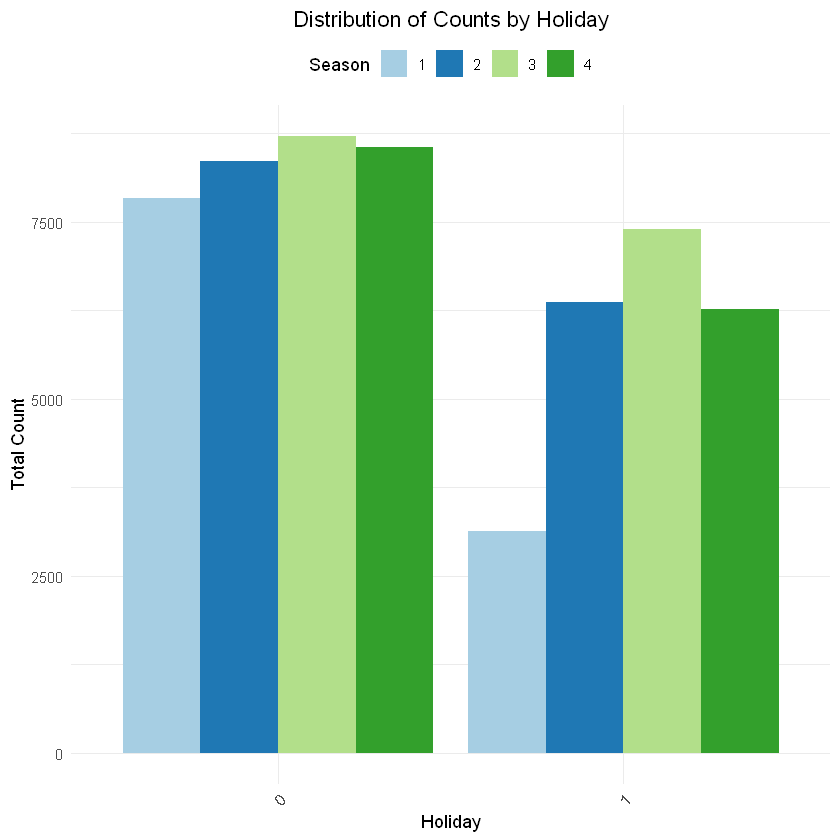

In [12]:
ggplot(bike_df, aes(x = factor(holiday), y = total_count, fill = season)) +
  geom_bar(stat = "identity", position = "dodge") + 
  scale_fill_brewer(palette = "Paired") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5), 
        legend.position = "top") + 
  labs(x = 'Holiday',
       y = 'Total Count',
       fill = 'Season',
       title = 'Distribution of Counts by Holiday')

From the above plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.
Here, 0->No holiday, 1-> holiday


**Working day distribution**

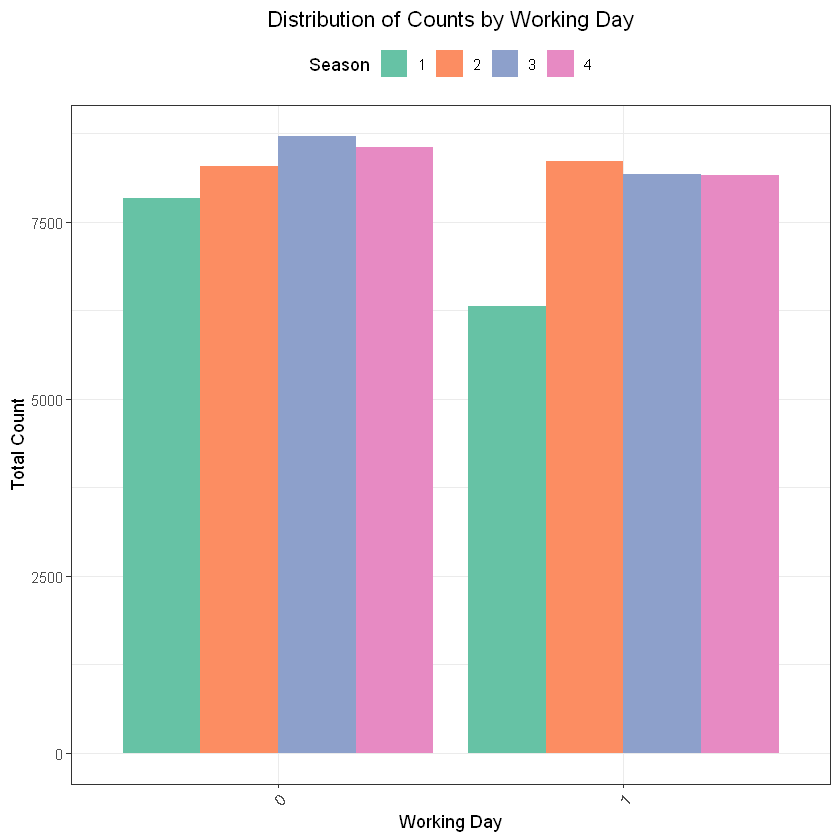

In [13]:
ggplot(bike_df, aes(x = factor(workingday), y = total_count, fill = season)) +
  geom_col(position = "dodge") + 
  scale_fill_brewer(palette = "Set2") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        plot.title = element_text(hjust = 0.5),
        legend.position = "top") + 
  labs(x = 'Working Day',
       y = 'Total Count',
       fill = 'Season',
       title = 'Distribution of Counts by Working Day')

From the above plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.
Here, 0-> No workingday, 1-> workingday


**Weather condition distribution**

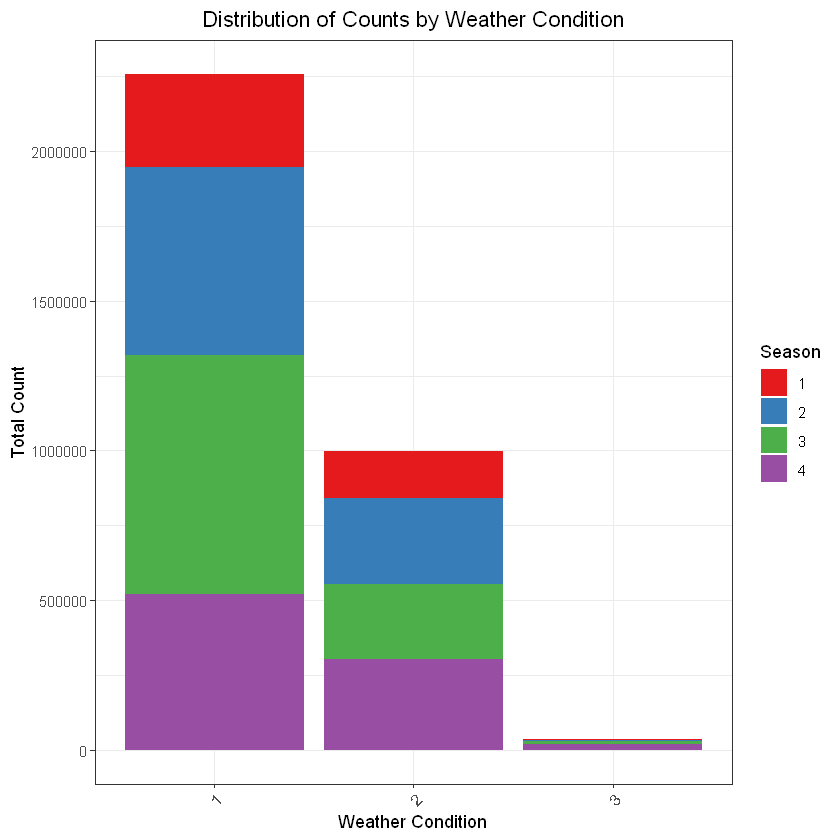

In [14]:
ggplot(bike_df, aes(x = weather_condition, y = total_count, fill = season)) +
  geom_col() +
  scale_fill_brewer(palette = "Set1") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        plot.title = element_text(hjust = 0.5)) + 
  labs(x = 'Weather Condition',
       y = 'Total Count',
       fill = 'Season',
       title = 'Distribution of Counts by Weather Condition')

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

**Outlier Correction**

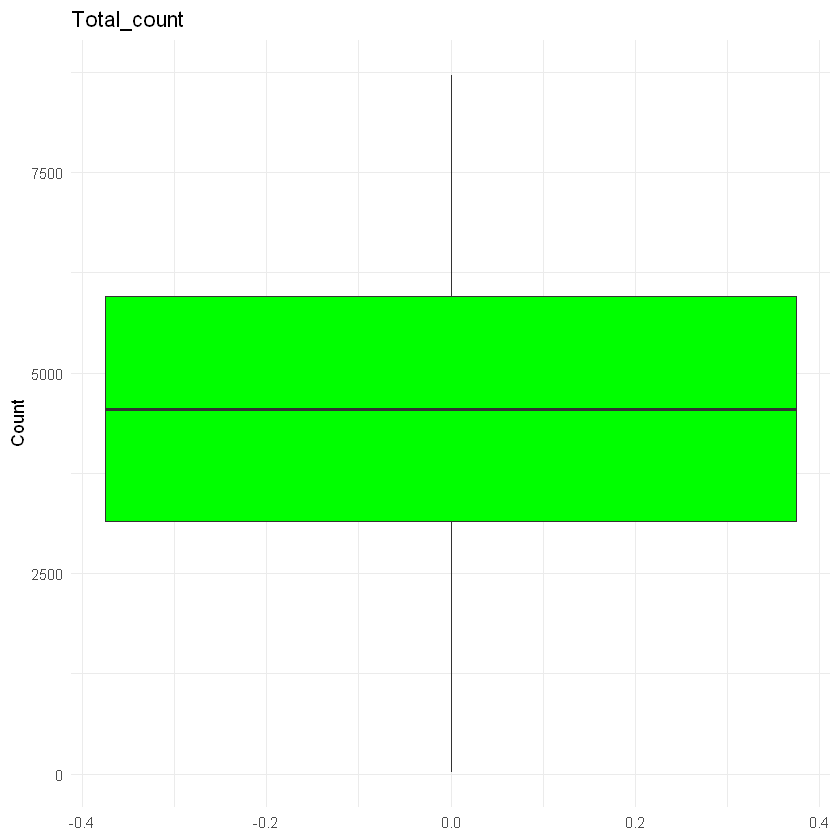

In [15]:
ggplot(bike_df, aes(y = total_count)) + geom_boxplot(fill = "green", outlier.color = "red", outlier.size = 3) +
  labs(title = "Total_count", y = "Count") +
  
  theme_minimal()

From the box plot, we can observed that no outliers are present in total_count variable.


***Temp_WindSpeed_Humidity Distribution***
<br>Reshaping

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0001-01-20,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,0002-01-20,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,0003-01-20,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,0004-01-20,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,0005-01-20,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


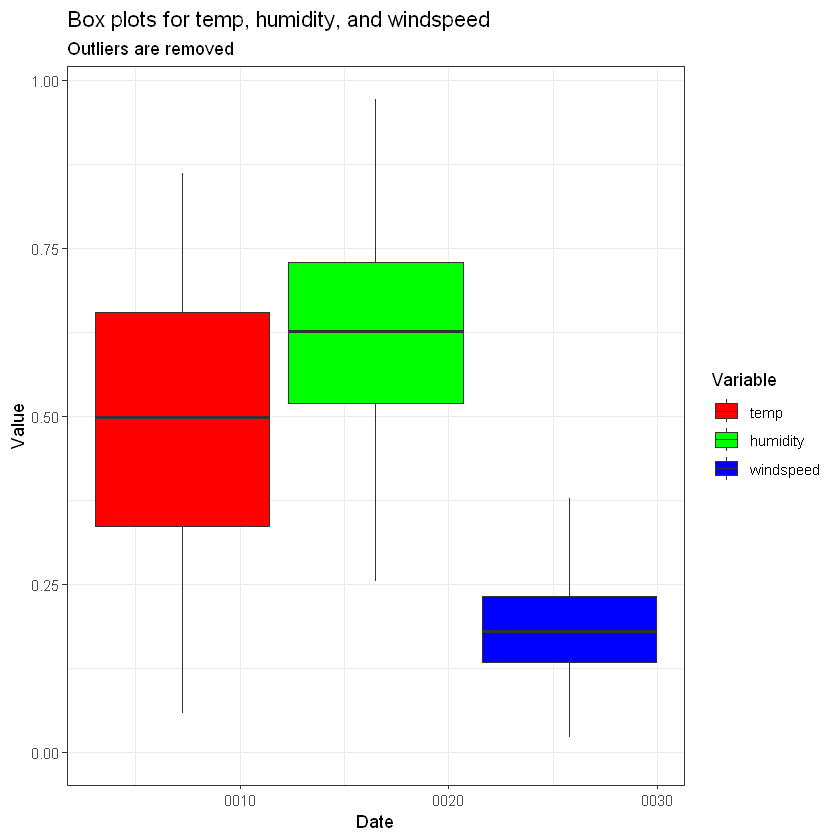

In [16]:
bike_long <- reshape2::melt(bike_df, id.vars = "datetime", measure.vars = c("temp", "humidity", "windspeed"))

ggplot(bike_long, aes(x = datetime, y = value, fill = variable)) +
  geom_boxplot(outlier.shape = NA) +
  scale_fill_manual(values = c("red", "green", "blue")) + 
  theme_bw() + 
  labs(x = "Date", y = "Value", fill = "Variable", 
       title = "Box plots for temp, humidity, and windspeed",
       subtitle = "Outliers are removed") 

head(bike_df,5)

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.


**Normal Probability plot**
<br>Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

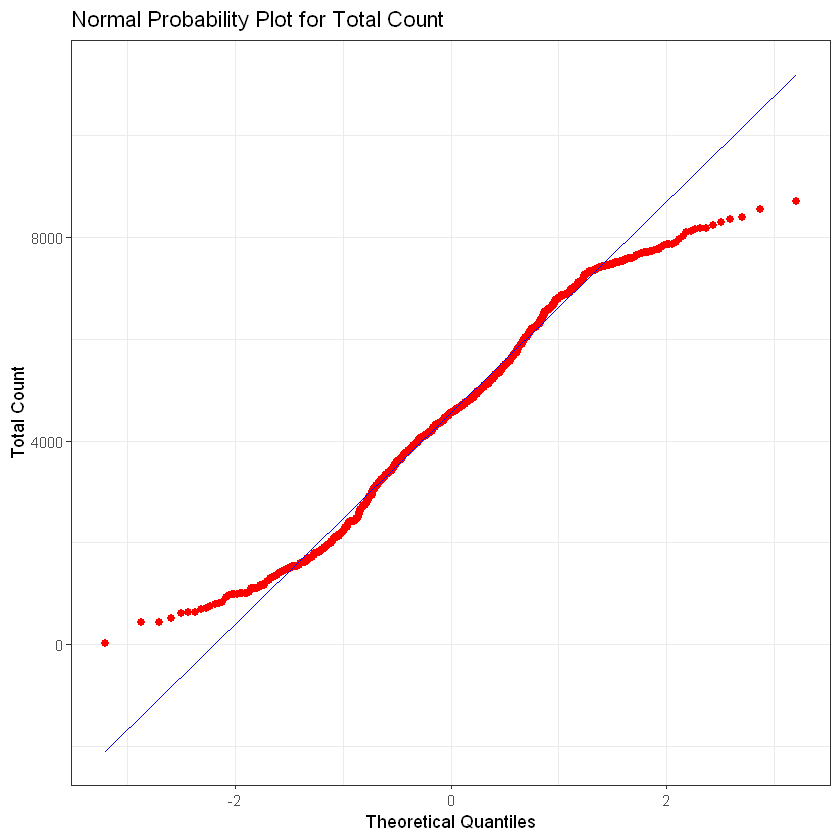

In [17]:
ggplot(mapping = aes(sample = bike_df$total_count)) +
  stat_qq(size = 2, color = "red") + 
  stat_qq_line(color = "blue") + 
  theme_bw() + 
  labs(x = "Theoretical Quantiles", y = "Total Count",
       title = "Normal Probability Plot for Total Count")

From the above probability plot, we can observed that some target variable data points are deviates from normality.


**Correlation Matrix**
<br>Correlation matrix is tells about linear relationship between attributes and help us to build better models.


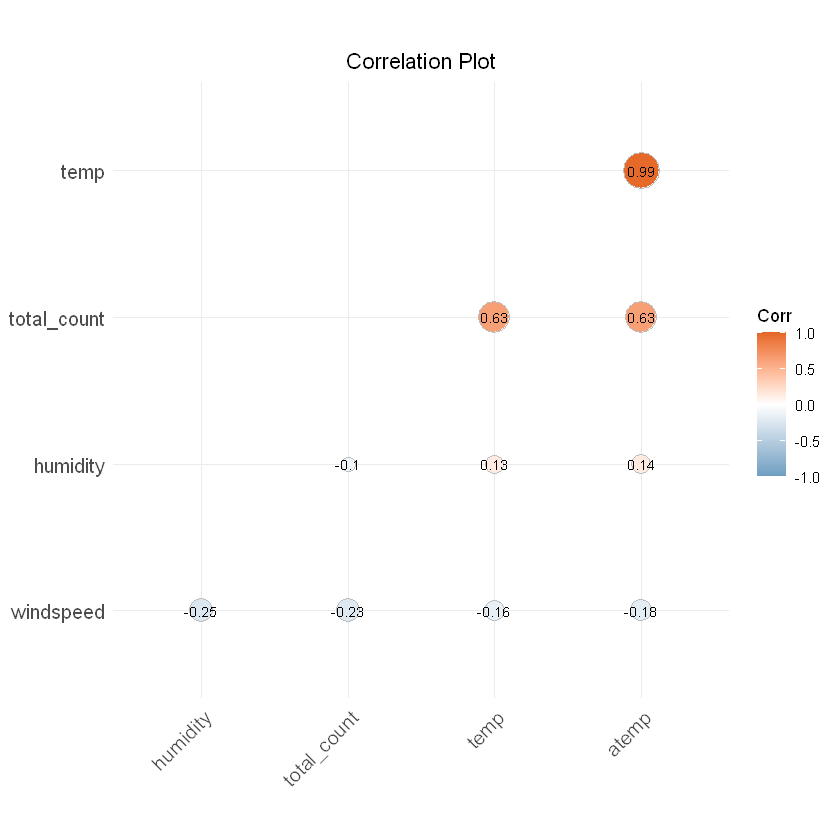

In [18]:
library(ggcorrplot)
correlation_matrix <- cor(bike_df[,10:14])

#Correlation plot
ggcorrplot(correlation_matrix, 
           hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("#6D9EC1", "white", "#E46726"), 
           title="Correlation Plot") +
  theme(plot.title = element_text(hjust = 0.5))


From correlation plot, we can observed that some features are positively correlated and some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information. So, we are going to ignore atemp variable for further analysis.


**Split the dataset into train and test dataset**

In [19]:
train_index<-sample(1:nrow(bike_df),0.7*nrow(bike_df))
train_data<-bike_df[train_index,]
test_data<-bike_df[-train_index,]
dim(train_data)
dim(test_data)

[1] 511  14

[1] 220  14

***Train***

In [20]:
head(train_data,5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
172,172,0021-06-20,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,4835
479,479,0023-04-20,2,1,4,0,1,1,2,0.321667,0.301125,0.766667,0.303496,3214
637,637,0028-09-20,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,7415
1,1,0001-01-20,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
197,197,0016-07-20,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,5923


***Test***

In [21]:
head(test_data,5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,3,0003-01-20,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
6,6,0006-01-20,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606
12,12,0012-01-20,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.3046270,1162
20,20,0020-01-20,1,0,1,0,4,1,2,0.261667,0.255050,0.538333,0.1959040,1927
28,28,0028-01-20,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.1233000,1167


***Selection of Required Variables***

Train

In [22]:
train<-subset(train_data,select=c('season','year','month','holiday', 'weekday','workingday','weather_condition','temp','humidity','windspeed','total_count'))
head(train,5)

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
172,3,0,6,0,2,1,2,0.680833,0.770417,0.171025,4835
479,2,1,4,0,1,1,2,0.321667,0.766667,0.303496,3214
637,4,1,9,0,5,1,2,0.619167,0.690000,0.164179,7415
1,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
197,3,0,7,0,6,0,1,0.686667,0.585000,0.208342,5923


Test

In [23]:
test<-subset(test_data,select=c('season','year','month','holiday','weekday','workingday','weather_condition','temp','humidity','windspeed','total_count'))
head(test,5)

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
3,1,0,1,0,1,1,1,0.196364,0.437273,0.2483090,1349
6,1,0,1,0,4,1,1,0.204348,0.518261,0.0895652,1606
12,1,0,1,0,3,1,1,0.172727,0.599545,0.3046270,1162
20,1,0,1,0,4,1,2,0.261667,0.538333,0.1959040,1927
28,1,0,1,0,5,1,2,0.203478,0.793043,0.1233000,1167


***Train and test categorical and numerical attributes***


In [24]:
train_cat_attributes<-subset(train,select=c('season','holiday','workingday','weather_condition','year'))
test_cat_attributes<-subset(test,select=c('season','holiday','workingday','weather_condition','year'))
train_num_attributes<-subset(train,select=c('weekday','month','temp','humidity','windspeed','total_count'))
test_num_attributes<-subset(test,select=c('weekday','month','temp', 'humidity','windspeed','total_count'))

**Encoding the categorical features**



***Train_encoded_attributes***

In [25]:
library(caret)

othervars <- c('month', 'weekday', 'temp', 'humidity', 'windspeed', 'total_count')
set.seed(2626)

vars <- setdiff(colnames(train), c("total_count", othervars))
f <- paste('~', paste(vars, collapse = ' + '))
encoder <- dummyVars(as.formula(f), train)
encode_attributes <- predict(encoder, train)
train_encoded_attributes <- cbind(train_num_attributes, encode_attributes)
head(train_encoded_attributes, 5)


Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.1.3"


,weekday,month,temp,humidity,windspeed,total_count,season.1,season.2,season.3,season.4,year.0,year.1,holiday.0,holiday.1,workingday.0,workingday.1,weather_condition.1,weather_condition.2,weather_condition.3
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
172,2,6,0.680833,0.770417,0.171025,4835,0,0,1,0,1,0,1,0,0,1,0,1,0
479,1,4,0.321667,0.766667,0.303496,3214,0,1,0,0,0,1,1,0,0,1,0,1,0
637,5,9,0.619167,0.690000,0.164179,7415,0,0,0,1,0,1,1,0,0,1,0,1,0
1,6,1,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,1,0,1,0,0,1,0
197,6,7,0.686667,0.585000,0.208342,5923,0,0,1,0,1,0,1,0,1,0,1,0,0


***Test_encoded_attributes***

In [26]:
set.seed(5662)
vars<-setdiff(colnames(test),c(test$total_count,othervars))
f<- paste('~',paste(vars,collapse='+'))
encoder<-dummyVars(as.formula(f),test)
encode_attributes<-predict(encoder,test)
test_encoded_attributes<-cbind(test_num_attributes,encode_attributes)
head(test_encoded_attributes,5)

,weekday,month,temp,humidity,windspeed,total_count,season.1,season.2,season.3,season.4,year.0,year.1,holiday.0,holiday.1,workingday.0,workingday.1,weather_condition.1,weather_condition.2,weather_condition.3
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,0.196364,0.437273,0.2483090,1349,1,0,0,0,1,0,1,0,0,1,1,0,0
6,4,1,0.204348,0.518261,0.0895652,1606,1,0,0,0,1,0,1,0,0,1,1,0,0
12,3,1,0.172727,0.599545,0.3046270,1162,1,0,0,0,1,0,1,0,0,1,1,0,0
20,4,1,0.261667,0.538333,0.1959040,1927,1,0,0,0,1,0,1,0,0,1,0,1,0
28,5,1,0.203478,0.793043,0.1233000,1167,1,0,0,0,1,0,1,0,0,1,0,1,0


**Modelling the training dataset**


**Linear Regression**

In [27]:
set.seed(672)
lr_model<-lm(train_encoded_attributes$total_count~.,train_encoded_attributes[,-c(6)])
summary(lr_model)


Call:
lm(formula = train_encoded_attributes$total_count ~ ., data = train_encoded_attributes[, 
    -c(6)])

Residuals:
     Min       1Q   Median       3Q      Max 
-2707.18  -351.13    39.77   428.94  2758.95 

Coefficients: (6 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2917.93     524.68   5.561 4.44e-08 ***
weekday1              317.65     125.75   2.526 0.011854 *  
weekday2              350.58     119.88   2.924 0.003614 ** 
weekday3              285.02     124.15   2.296 0.022112 *  
weekday4              378.60     117.78   3.214 0.001395 ** 
weekday5              394.96     121.36   3.255 0.001216 ** 
weekday6              470.56     119.33   3.944 9.22e-05 ***
month2                132.70     163.37   0.812 0.417047    
month3                716.91     187.58   3.822 0.000150 ***
month4                757.70     287.65   2.634 0.008708 ** 
month5               1095.23     308.54   3.550 0.000423 ***

***Cross validation prediction***

In [28]:
options(warn=-1)
set.seed(623)
train.control<-trainControl(method='CV',number=3)
CV_predict<-train(total_count~.,data=train_encoded_attributes,method='lm',trControl=train.control)
summary(CV_predict)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2707.18  -351.13    39.77   428.94  2758.95 

Coefficients: (6 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2917.93     524.68   5.561 4.44e-08 ***
weekday1              317.65     125.75   2.526 0.011854 *  
weekday2              350.58     119.88   2.924 0.003614 ** 
weekday3              285.02     124.15   2.296 0.022112 *  
weekday4              378.60     117.78   3.214 0.001395 ** 
weekday5              394.96     121.36   3.255 0.001216 ** 
weekday6              470.56     119.33   3.944 9.22e-05 ***
month2                132.70     163.37   0.812 0.417047    
month3                716.91     187.58   3.822 0.000150 ***
month4                757.70     287.65   2.634 0.008708 ** 
month5               1095.23     308.54   3.550 0.000423 ***
month6                905.57     326.42   2.774 0.005748 ** 
m



The adjusted R-squared or coefficient of determination is 0.83 on average for 3-fold cross validation , it means that predictor is only able to predict 83% of the variance in the target variable which is contributed by independent variables. The p-value is less than 0.05, means that it rejects the assumption of null hypothesis.

***Cross validation prediction plot***

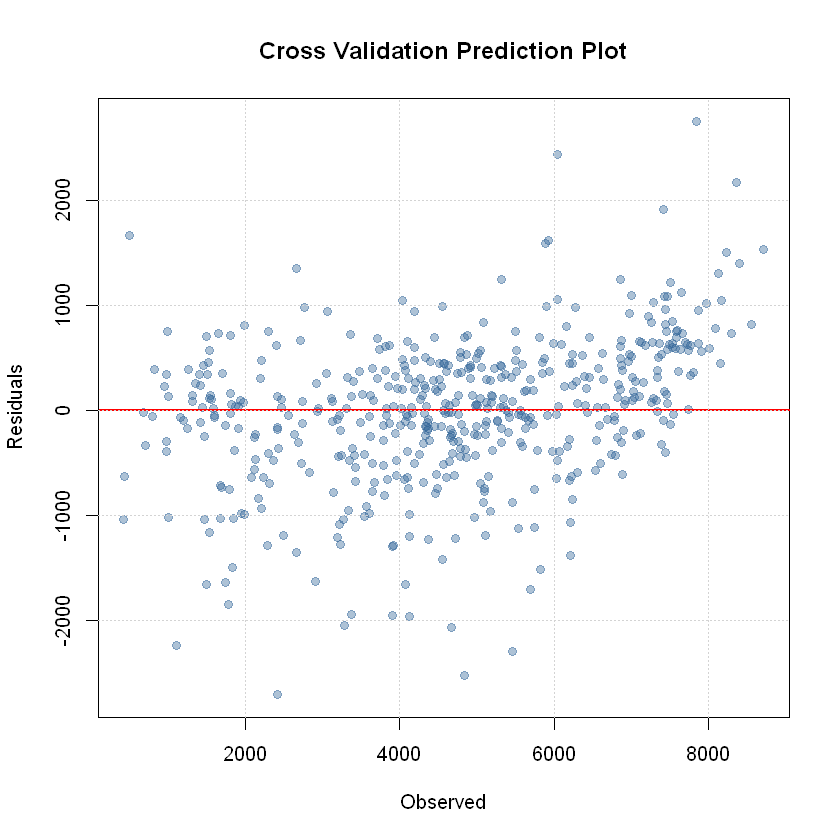

In [29]:
residuals <- resid(CV_predict)
y_train <- train_encoded_attributes$total_count

plot(y_train, residuals, 
     ylab = 'Residuals', 
     xlab = 'Observed', 
     main = 'Cross Validation Prediction Plot',
     pch = 19,
     col = rgb(0.2, 0.4, 0.6, alpha = 0.4))
abline(h = 0, col = "red", lwd = 2)
grid()
par(mar = c(5.1, 4.1, 4.1, 2.1))



Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.




***Model performance on test data***

In [30]:
set.seed(6872)
options(warn=-1)
lm_predict<- predict(lr_model,test_encoded_attributes[,-c(6)])
head(lm_predict,5)

3         6        12        20        28 
1348.7508 1846.9520  780.1928 1249.5156  880.4890

***Root mean squared error and mean absolute error***

In [31]:
set.seed(688)
rmse<-RMSE(lm_predict, test_encoded_attributes$total_count)
print(rmse)
mae<-MAE(lm_predict, test_encoded_attributes$total_count)
print(mae)

[1] 908.9933
[1] 643.8778


***Residual plot***

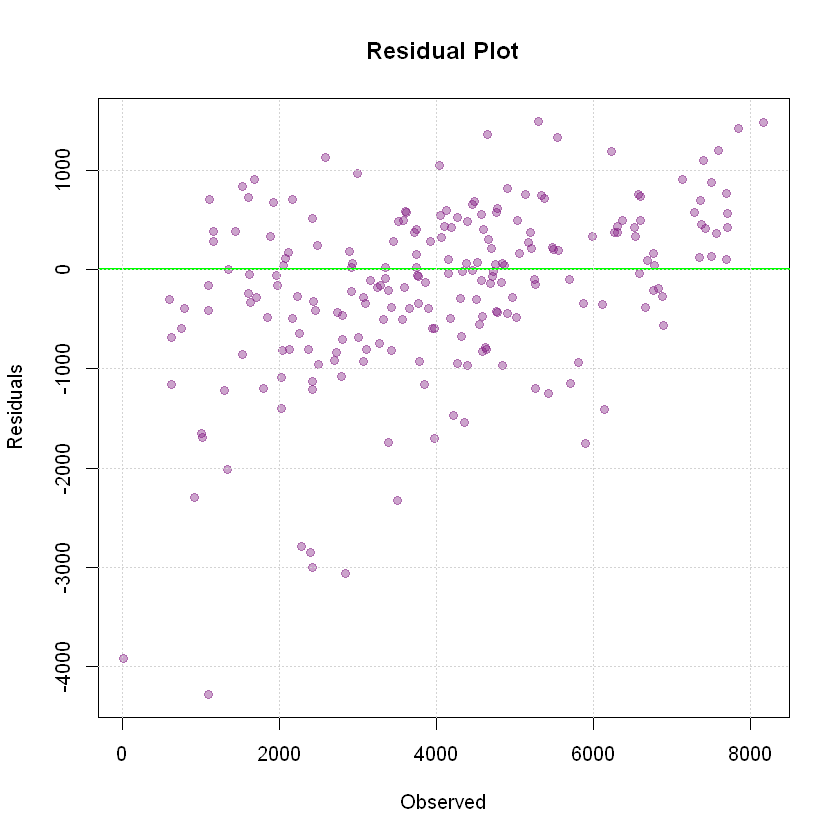

In [32]:
y_test <- test_encoded_attributes$total_count
residuals <- y_test - lm_predict

plot(y_test, residuals, 
     xlab = 'Observed', 
     ylab = 'Residuals', 
     main = 'Residual Plot',
     pch = 19,
     col = rgb(0.5, 0.1, 0.5, alpha = 0.4))
abline(h = 0, col = "green", lwd = 2)
grid()
par(mar = c(4, 3, 2, 1))




Residual plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.


**Decision Tree**

In [33]:
set.seed(568)
library(rpart)
rpart.control<-rpart.control(minbucket = 2,cp = 0.01,maxcompete = 3, maxsurrogate = 4, usesurrogate = 2, xval = 3,surrogatestyle = 0, maxdepth = 10) 
dtr<-rpart(train_encoded_attributes$total_count~.,data=train_encoded_attributes[,-c(6)],control=rpart.control,method='anova',cp=0.01)
dtr

n= 511 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 511 1914225000.0 4696.781  
   2) temp< 0.432174 192  471587300.0 3177.349  
     4) year.0>=0.5 96  101503200.0 2153.531  
       8) season.4< 0.5 68   19547550.0 1635.882 *
       9) season.4>=0.5 28   19482590.0 3410.679 *
     5) year.0< 0.5 96  168829200.0 4201.167  
      10) season.1>=0.5 50   46615420.0 3281.720  
        20) temp< 0.2804165 23   12532050.0 2586.739 *
        21) temp>=0.2804165 27   13511210.0 3873.741 *
      11) season.1< 0.5 46   33999960.0 5200.565 *
   3) temp>=0.432174 319  732580000.0 5611.298  
     6) year.0>=0.5 145  109169800.0 4308.593  
      12) weather_condition.3>=0.5 7     946211.7 2281.429 *
      13) weather_condition.3< 0.5 138   77998670.0 4411.420 *
     7) year.0< 0.5 174  172280500.0 6696.885  
      14) humidity>=0.8322915 7    4011117.0 4690.143 *
      15) humidity< 0.8322915 167  138898700.0 6781.000  
        30) month=2,3,4,5,7,11,12 76   49858240.0 6

***Plot***

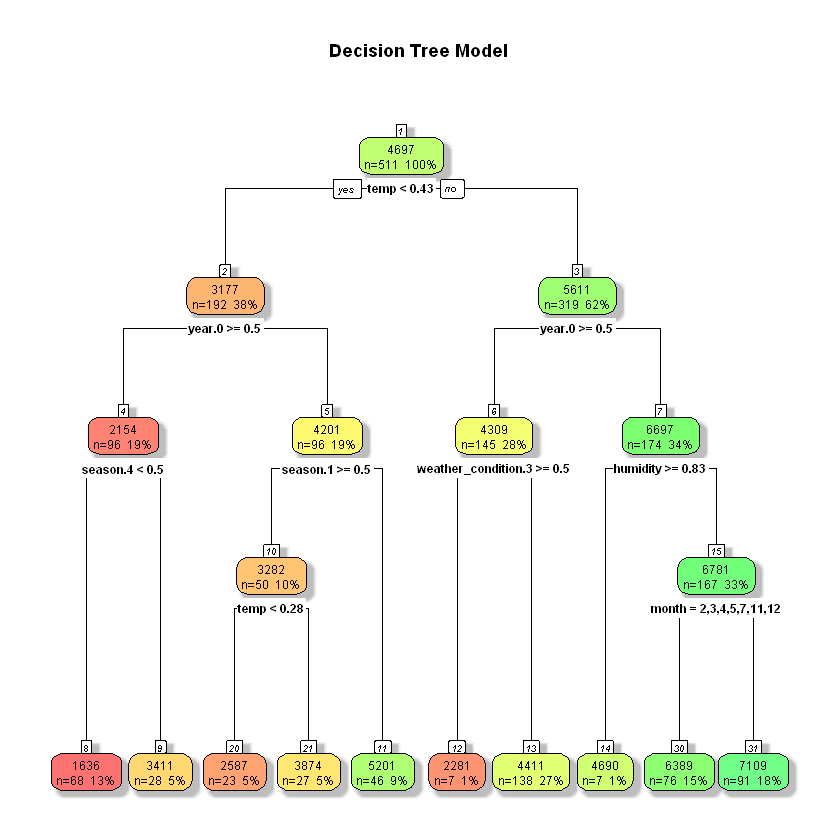

In [34]:
library(rpart.plot)
# Plot the learned decision tree model
rpart.plot(dtr, 
           box.palette = "RdYlGn", 
           shadow.col = "gray", 
           nn = TRUE,
           roundint = FALSE,
           fallen.leaves = TRUE, 
           main = "Decision Tree Model",
           extra = 101, 
           tweak = 1)

***Cross validation prediction***

In [35]:
options(warn=-1)
set.seed(5769)
train.control<-trainControl(method='CV',number=3)
dtr_CV_predict<-train(total_count~.,data=train_encoded_attributes,method='rpart',trControl=train.control)
dtr_CV_predict

CART 

511 samples
 18 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 341, 340, 341 
Resampling results across tuning parameters:

  cp         RMSE      Rsquared   MAE      
  0.1051365  1132.561  0.6607418   899.7378
  0.2356722  1478.369  0.4143560  1231.4617
  0.3709376  1720.180  0.3146286  1437.2166

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.1051365.


The R-squared or coefficient of determination is 0.60 on average for 3-fold cross validation , it means that predictor is only able to predict 60% of the variance in the target variable which is contributed by independent variables.


***Cross validation prediction plot***

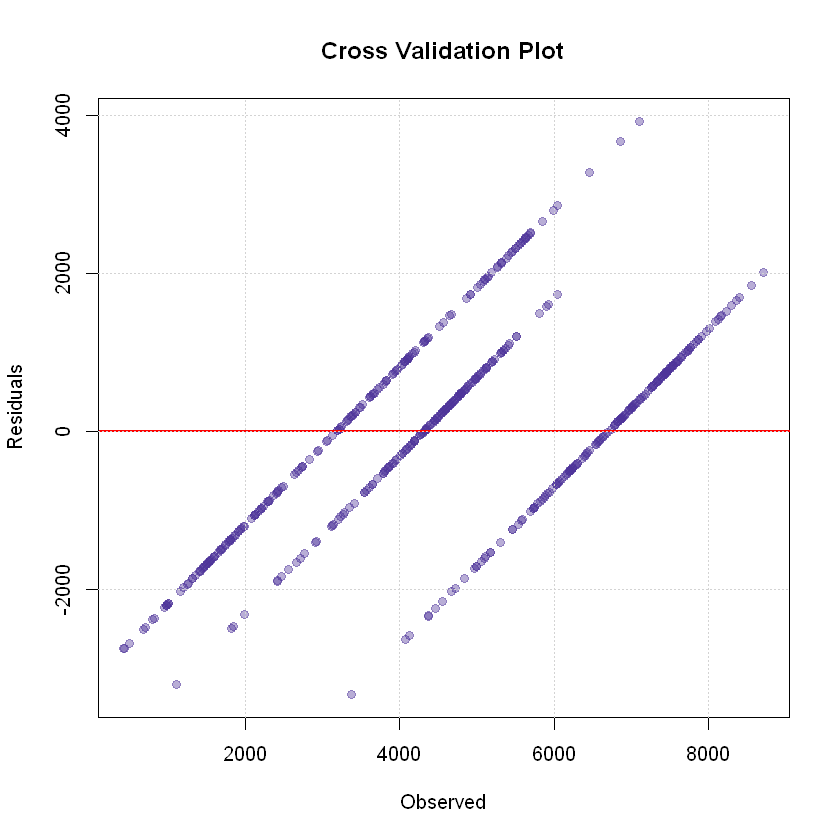

In [36]:
residuals <- resid(dtr_CV_predict)

plot(y_train, residuals, 
     xlab = 'Observed', 
     ylab = 'Residuals', 
     main = 'Cross Validation Plot',
     pch = 19, 
     col = rgb(0.3, 0.2, 0.6, alpha = 0.4)) 
abline(h = 0, col = "red", lwd = 2)
grid()
par(mar = c(5.1, 4.1, 4.1, 2.1))



Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.




***Model performance on the test dataset***

In [37]:
set.seed(7882)
dtr_predict<-predict(dtr,test_encoded_attributes[,-c(6)])
head(dtr_predict,5)

3        6       12       20       28 
1635.882 1635.882 1635.882 1635.882 1635.882

***Root mean squared error and mean absolute error***


In [38]:
set.seed(6889)
rmse<-RMSE(y_test,dtr_predict)
print(rmse)
mae<-MAE(y_test,dtr_predict)
print(mae)

[1] 1002.157
[1] 703.514


***Residual plot***

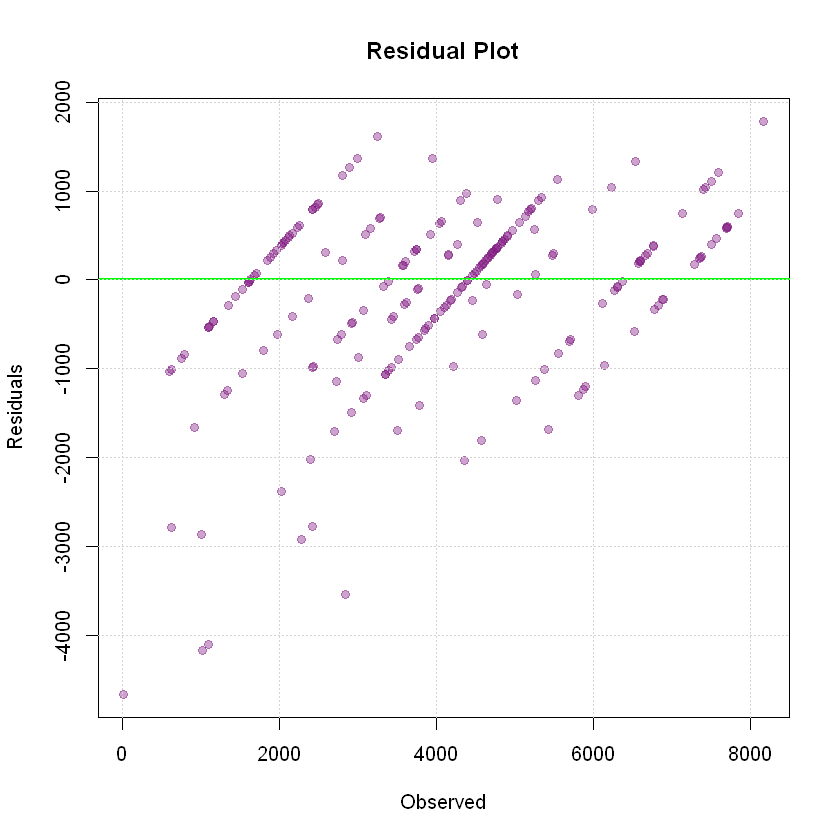

In [39]:
residuals <- y_test - dtr_predict

plot(y_test, residuals, 
     xlab = 'Observed', 
     ylab = 'Residuals', 
     main = 'Residual Plot',
     pch = 19,
     col = rgb(0.5, 0.1, 0.5, alpha = 0.4))
abline(h = 0, col = "green", lwd = 2)
grid()
par(mar = c(5.1, 4.1, 4.1, 2.1))



Residual plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.


**Random Forest**

In [42]:
set.seed(6788271)
library(randomForest)
rf_model <- randomForest(total_count ~ ., train_encoded_attributes, importance = TRUE, ntree = 200)
print(rf_model)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = total_count ~ ., data = train_encoded_attributes,      importance = TRUE, ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 6

          Mean of squared residuals: 416620.2
                    % Var explained: 88.88


***Cross validation prediction***

In [43]:
#install.packages('ranger')
#library(ranger)
options(warn=-1)
set.seed(6772)
library(randomForest)
library(ranger)
train.control<-trainControl(method='CV',number=3)
rf_CV_predict<-train(total_count~.,train_encoded_attributes,method='ranger',trControl=train.control)
rf_CV_predict


Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




Random Forest 

511 samples
 18 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 340, 342, 340 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE     
   2    variance     970.2676  0.8593948  780.9338
   2    extratrees  1030.9566  0.8383887  824.8574
  17    variance     657.8152  0.8864155  466.1428
  17    extratrees   689.0908  0.8747810  498.3550
  33    variance     674.7069  0.8801780  475.2801
  33    extratrees   684.7438  0.8761063  491.4590

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 17, splitrule = variance
 and min.node.size = 5.



The R-squared or coefficient of determination is 0.86 on average for 3-fold cross validation,it means that predictor is only able to predict 86% of the variance in the target variable which is contributed by independent variables.


***Cross validation prediction plot***

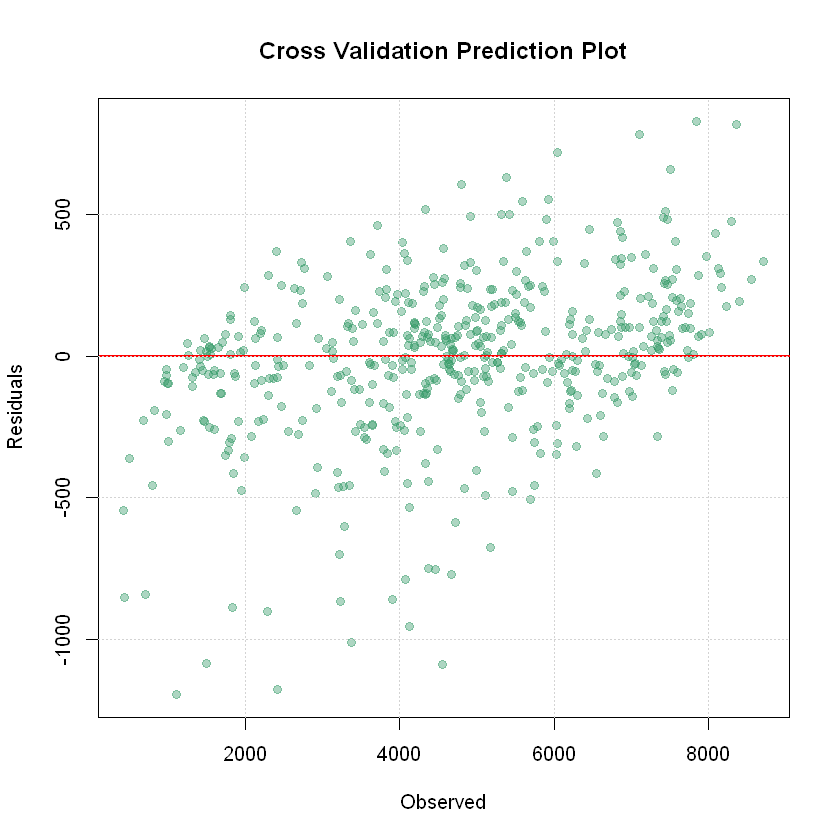

In [44]:
residuals <- resid(rf_CV_predict)

plot(y_train, residuals, 
     xlab = 'Observed', 
     ylab = 'Residuals', 
     main = 'Cross Validation Prediction Plot',
     pch = 19,
     col = rgb(0.2, 0.6, 0.4, alpha = 0.4))

abline(h = 0, col = "red", lwd = 2)
grid()
par(mar = c(5.1, 4.1, 4.1, 2.1))




Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.




***Model performance on the test dataset***

In [45]:
set.seed(7889)
rf_predict<-predict(rf_model,test_encoded_attributes[,-c(6)])
head(rf_predict,5)

3        6       12       20       28 
1449.011 1441.261 1439.758 1683.936 1361.277

***Root mean squared error and mean absolute error***

In [46]:
set.seed(667)
rmse<-RMSE(y_test,rf_predict)
print(rmse)
mae<-MAE(y_test,rf_predict)
print(mae)

[1] 844.5069
[1] 536.8708


***Residual plot***

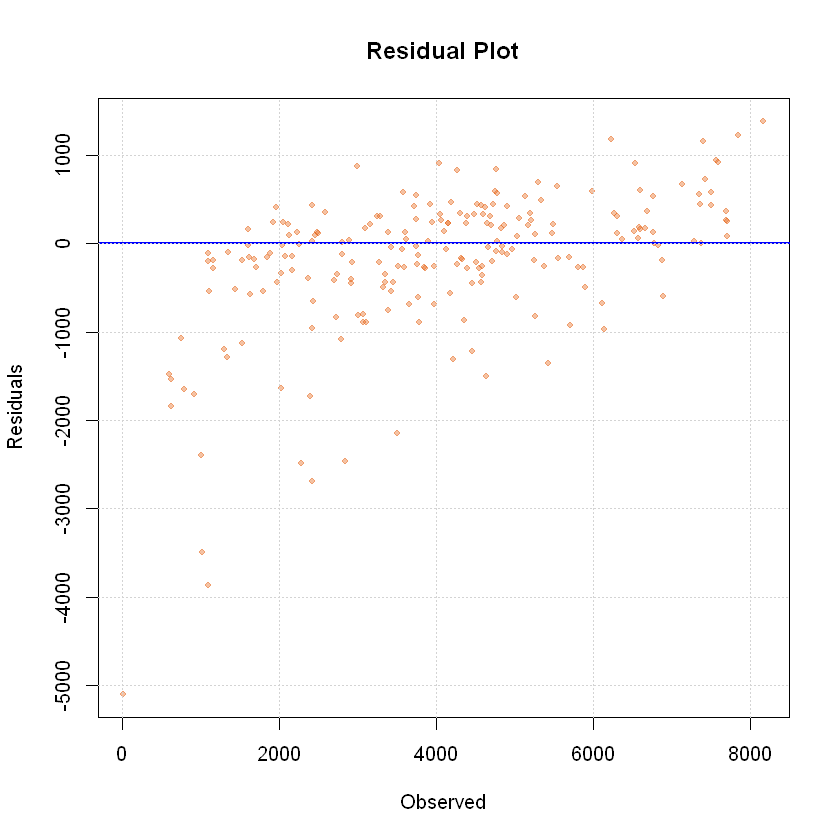

In [47]:
residuals <- y_test - rf_predict

plot(y_test, residuals, 
     xlab = 'Observed', 
     ylab = 'Residuals', 
     main = 'Residual Plot',
     pch = 20,
     col = rgb(0.9, 0.4, 0.1, alpha = 0.4))
abline(h = 0, col = "blue", lwd = 2)
grid()
par(mar = c(5.1, 4.1, 4.1, 2.1))

**Final model for predicting the bike rental count on daily basis**



In [48]:
Bike_predictions=data.frame(y_test,rf_predict)
write.csv(Bike_predictions,'Bike_Renting_R.CSV',row.names=F)
Bike_predictions

,y_test,rf_predict
,<int>,<dbl>
3,1349,1449.011
6,1606,1441.261
12,1162,1439.758
20,1927,1683.936
28,1167,1361.277
29,1098,1206.173
30,1096,1297.148
33,1526,1709.932
37,1623,1779.968




When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is best for predicting the bike rental count on daily basis.
